# DSC540 Project 1

DePaul University  
Kushal Navghare, MS-DS  
Chicago, IL  

In [99]:
import sklearn
sklearn.__version__

'1.3.0'

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [101]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [102]:
# Your package imports here

In [103]:
import warnings
warnings.filterwarnings(action='ignore')

# DSC540 Project 1

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### YOUR NAME HERE

**Honor Pledge:**  
I pledge on my honor that I, **Student Name**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

**Variable Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
    
    
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

### Load the dataset

- Since the dataset at the UCI repository does not have headers, we will read the data from the hard drive which I have modified.
- Last column is the target column.
- The ID column is already dropped.

In [104]:
df = pd.read_csv('data/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:
df.columns = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [106]:
df.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [107]:
X = df.drop(['id', 'diagnosis'], axis=1)

In [108]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [109]:
y = df.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Question 1 [10 points]
How many people have cancer?

> Hint: Should be less than 300!

In [110]:
# code

canc_cnt = y[y=='M'].value_counts()
print(f'People with cancer {canc_cnt}')


People with cancer diagnosis
M    212
Name: count, dtype: int64


Ans: 212 people have malignant cancer.

212 people have malignant cancer.


Check the feature set `X` and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [111]:
# code

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

From above `df.info()` code:
- All the columns are of numeric data type. (D-type column from above info table) 
- None of the variables are of categorical type. 
- There are no null values present in any column. (Non-Null Count column from above info table)
- There are total of 30 columns/features in the dataset and 569 observations.

- No missing values. 
- No categorical variables. 
- 569 observations, 30 columns.

### Question 2 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- Among the `mean` (the first 10) features, which one has the minimum 25% percentile value? 
- Which `mean` variable (the first 10 features) has the largest mean value?

In [112]:
# code
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From above `df.describe()` code:
- Features in the dataset are in different ranges (`mean radius within (6.98, 28.11) while radius error in (0.11, 2.87)`. There is a large difference between features.

In [113]:
# Feature with highest mean in first 10 columns
# list of first 10 column names
col_10 = X.columns[:10]

# summary stats of first 10 columns, sorted by 25% values
X[col_10].describe().T.sort_values('25%', ascending=True)

,count,mean,std,min,25%,50%,75%,max
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000


- mean concave points has minimun 25% percentile value in first 10 columns list

In [114]:
# summary stats of first 10 columns, sorted by mean values, descending order
X[col_10].describe().T.sort_values('mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000


- mean area has the highest mean value in first 10 columns list.

- There are large differences between the variables.
- `mean area` has the largest mean value
- `mean concave points` has the minimum 25% percentile value.

### Question 3 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [115]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [116]:
# code
# calculate correlation and store as dataframe
corr_df = X.corr()

<Axes: >

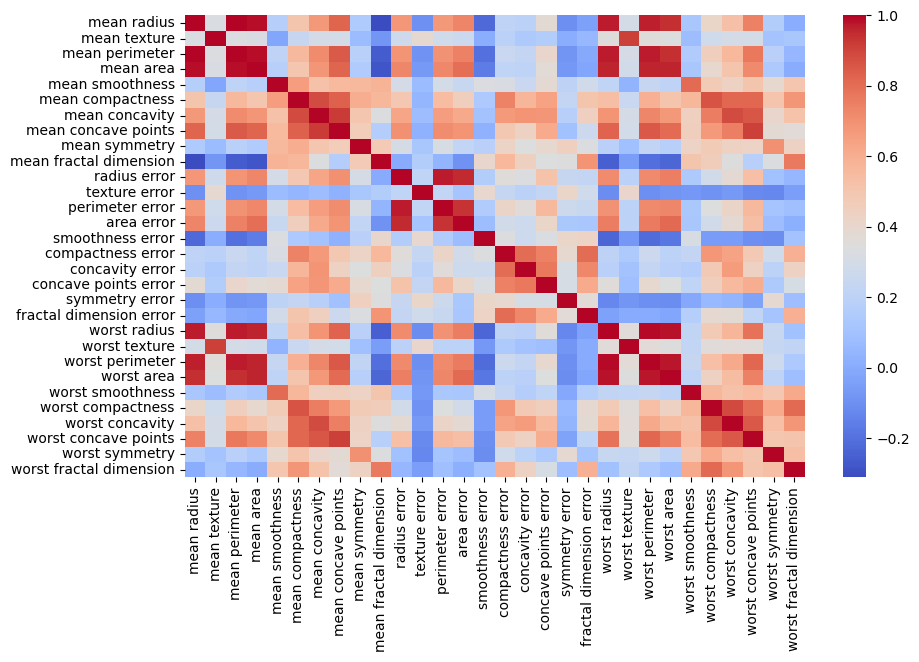

In [117]:
# seaborn correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, cmap='coolwarm', annot=False)

In [118]:
corr_df.unstack().sort_values()

mean fractal dimension   mean radius               -0.311631
mean radius              mean fractal dimension    -0.311631
mean fractal dimension   mean area                 -0.283110
mean area                mean fractal dimension    -0.283110
mean perimeter           mean fractal dimension    -0.261477
                                                      ...   
worst smoothness         worst smoothness           1.000000
worst compactness        worst compactness          1.000000
worst concavity          worst concavity            1.000000
smoothness error         smoothness error           1.000000
worst fractal dimension  worst fractal dimension    1.000000
Length: 900, dtype: float64

From above heatmap created using `sns.heatmap(data)` of the output of `df.corr()` code:
- Features with darker (red or blue) indicate strong correlation between their corresponding row-column feature pair. Red gradient represents positive correlation while blue gradient shows negative correlation.
- For example, `worst perimeter` and `mean radius` has strong positive correlation. Meaning, increase in `mean radius` will increase `worst perimeter`.
- Similarly, `mean radius, mean area and mean perimeter` are strongly correlated to each other. This is expected as, radius is directly proportional to area and perimeter.
- `perimeter error` and `concavity error` has no strong correlation. Similarly, `worst area` and `concave points error` has no strong correlation.
- `mean fractal dimension` and `mean radius` has strong negative correlation. However, for negative correlation, the range does not go beyond ~-0.30 (see the gradient scale in heatmap). Meaning there is slight negative correlation among these 2 variables.

### Train - Test split 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [119]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [120]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [121]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [122]:
y = lb.fit_transform(y).ravel()

In [123]:
y = pd.Series(y)

In [124]:
y.value_counts()

0    357
1    212
Name: count, dtype: int64

In [125]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [126]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
Name: proportion, dtype: float64

In [127]:
y_test.value_counts(normalize=True)

0    0.629371
1    0.370629
Name: proportion, dtype: float64

Stratified random sampling ensures that the splits keep their proportion of targets values. This is important to stay consistent with the data collected.

Now let's train a logistic regression model on the breast cancer data. This is a binary classification problem.

### Question 4 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
clf = LogisticRegression(max_iter = 10000, C=0.1)

In [130]:
# code
# fit logistic regression model
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [131]:
# predict on test data
test_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

In [132]:
# Accuracy
print(f'Accuracy score is: Train {metrics.accuracy_score(y_true=y_train, y_pred=train_pred)}')
print(f'Accuracy score is:  Test {metrics.accuracy_score(y_true=y_test, y_pred=test_pred)}')

Accuracy score is: Train 0.9413145539906104
Accuracy score is:  Test 0.986013986013986


In [133]:
print('Confusion matrix\n', metrics.confusion_matrix(y_true=y_test, y_pred=test_pred))

Confusion matrix
 [[89  1]
 [ 1 52]]


Above is confusion matrix, generated using `sklearn.metrics.confusion_matrix` from scikit-learn.
- Numbers across diagonal, `89 and 52` represents the correct predictions of label.
- Rest are misclassified observations.
- Here, only 2 observations have been misclassified by the model.

In [134]:
# save confusion matrix into tp, tn, fp, fn

tn, fp, fn, tp = metrics.confusion_matrix(y_test, test_pred).ravel()

In [135]:
rec = tp/(tp+fn)
specf = tn/(tn+fp)
prec = tp/(tp+fp)
fps = fp/(fp+tn)

In [136]:
print('Recall: ', rec)

print('\nSpecificity: ', specf)

print('\nPrecision: ', prec)

print('\nFalse Positive rate: ', fps)

Recall:  0.9811320754716981

Specificity:  0.9888888888888889

Precision:  0.9811320754716981

False Positive rate:  0.011111111111111112


In [137]:
f1_score = ((prec*rec)/(prec+rec))*2

In [138]:
print('F1 score: ', f1_score)

F1 score:  0.9811320754716981


In [139]:
print('Classification report\n\n', metrics.classification_report(y_true=y_test, y_pred=test_pred))

Classification report

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



### Question 5 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
clf = KNeighborsClassifier(n_neighbors=1)

In [142]:
# code
# fit k-nearest neighbors model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [143]:
# predict
train_pred = clf.predict(X_train.values)
test_pred = clf.predict(X_test.values)

In [144]:
# Accuracy
print(f'Accuracy score is: Train {metrics.accuracy_score(y_true=y_train, y_pred=train_pred)}')
print(f'Accuracy score is:  Test {metrics.accuracy_score(y_true=y_test, y_pred=test_pred)}')

Accuracy score is: Train 1.0
Accuracy score is:  Test 0.9440559440559441


In [145]:
print('Confusion matrix\n', metrics.confusion_matrix(y_true=y_test, y_pred=test_pred))

Confusion matrix
 [[86  4]
 [ 4 49]]


In [146]:
# save confusion matrix in tp, tn, fp, fn
tn, fp, fn, tp = metrics.confusion_matrix(y_test, test_pred).ravel()

In [147]:
rec = tp/(tp+fn)
specf = tn/(tn+fp)
prec = tp/(tp+fp)
fps = fp/(fp+tn)

In [148]:
print('Recall: ', rec)

print('\nSpecificity: ', specf)

print('\nPrecision: ', prec)

print('\nFalse Positive rate: ', fps)

Recall:  0.9245283018867925

Specificity:  0.9555555555555556

Precision:  0.9245283018867925

False Positive rate:  0.044444444444444446


In [149]:
f1_score = ((prec*rec)/(prec+rec))*2

In [150]:
print('F1 score: ', f1_score)

F1 score:  0.9245283018867925


In [151]:
print('Classification report\n\n', metrics.classification_report(y_true=y_test, y_pred=test_pred))

Classification report

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Question 6 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each C value and the corresponding train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [152]:
# code
# list of C values
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
train_acc_list = []
test_acc_list = []

for c_val in C_list:
    # initiate and fit model
    clf = LogisticRegression(C=c_val)
    clf.fit(X_train, y_train)
    
    # predict on train test
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # get train test accuracy
    train_acc_list.append(metrics.accuracy_score(y_train, train_pred))
    test_acc_list.append(metrics.accuracy_score(y_test, test_pred))

print('Train accuracy list:\n', train_acc_list)
print('\nTest accuracy list:\n', test_acc_list)

Train accuracy list:
 [0.9248826291079812, 0.931924882629108, 0.9248826291079812, 0.9295774647887324, 0.931924882629108, 0.931924882629108, 0.9342723004694836, 0.9366197183098591, 0.9389671361502347, 0.9389671361502347, 0.9436619718309859, 0.9342723004694836, 0.9483568075117371, 0.9507042253521126, 0.9436619718309859, 0.9460093896713615, 0.9507042253521126, 0.9460093896713615, 0.9507042253521126]

Test accuracy list:
 [0.9370629370629371, 0.958041958041958, 0.9300699300699301, 0.9370629370629371, 0.9440559440559441, 0.972027972027972, 0.986013986013986, 0.986013986013986, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.986013986013986, 0.972027972027972, 0.9790209790209791, 0.986013986013986, 0.9790209790209791, 0.986013986013986]


Text(0.5, 1.0, 'Train Test accuracy of LogisticRegression model')

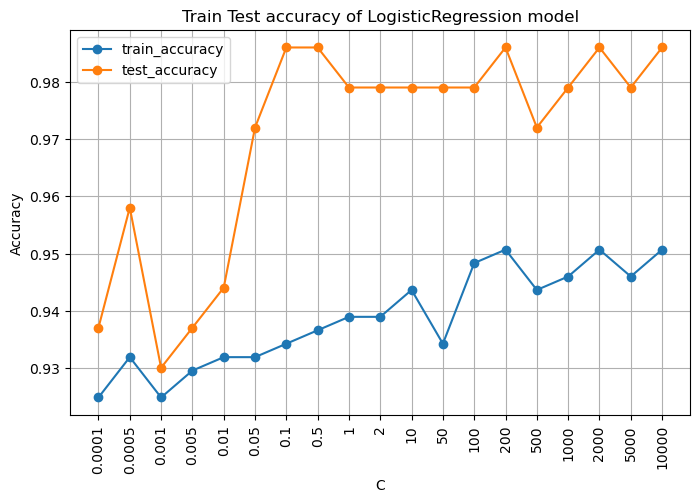

In [153]:
plt.figure(figsize=(8, 5))
plt.plot([str(c) for c in C_list], train_acc_list, label='train_accuracy', marker='o')
plt.plot([str(c) for c in C_list], test_acc_list, label='test_accuracy', marker='o')
plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title("Train Test accuracy of LogisticRegression model")

### Question 7 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [154]:
# code
# code
# list of K values
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]
train_acc_list = []
test_acc_list = []

for k_neighbors in K_list:
    # initiate and fit model
    clf = KNeighborsClassifier(n_neighbors=k_neighbors)
    clf.fit(X_train, y_train)
    
    # predict on train test
    train_pred = clf.predict(X_train.values)
    test_pred = clf.predict(X_test.values)
    
    # get train test accuracy
    train_acc_list.append(metrics.accuracy_score(y_train, train_pred))
    test_acc_list.append(metrics.accuracy_score(y_test, test_pred))

print('Train accuracy list:\n', train_acc_list)
print('\nTest accuracy list:\n', test_acc_list)

Train accuracy list:
 [1.0, 0.9483568075117371, 0.9460093896713615, 0.9389671361502347, 0.931924882629108, 0.9248826291079812, 0.9272300469483568, 0.9248826291079812, 0.9225352112676056, 0.9225352112676056, 0.9225352112676056, 0.9131455399061033, 0.9084507042253521]

Test accuracy list:
 [0.9440559440559441, 0.965034965034965, 0.9370629370629371, 0.9440559440559441, 0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9230769230769231, 0.9300699300699301]


Text(0.5, 1.0, 'Train Test accuracy of KNearestNeighbors model')

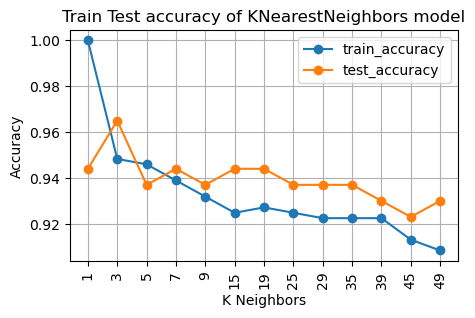

In [155]:
plt.figure(figsize=(5, 3))
plt.plot([str(k) for k in K_list], train_acc_list, label='train_accuracy', marker='o')
plt.plot([str(k) for k in K_list], test_acc_list, label='test_accuracy', marker='o')
plt.legend()
plt.grid()
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title("Train Test accuracy of KNearestNeighbors model")

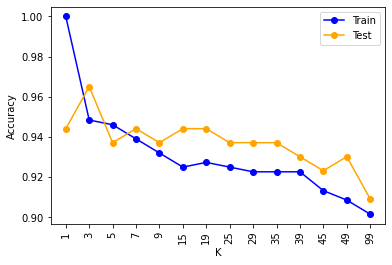

In [50]:
# code

### Question 8 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data.
- In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
- Plot validation curves. What do you see? 
- Which value would you choose for C in logistic regression?

In [156]:
from sklearn import preprocessing

In [157]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [158]:
# define list of values for C
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

train_acc_list = []
test_acc_list = []

for c_val in C_list:
    # initiate and fit model
    clf = LogisticRegression(C=c_val)
    clf.fit(X_train_ss, y_train)
    
    # predict on train test
    train_pred = clf.predict(X_train_ss)
    test_pred = clf.predict(X_test_ss)
    
    # get train test accuracy
    train_acc_list.append(metrics.accuracy_score(y_train, train_pred))
    test_acc_list.append(metrics.accuracy_score(y_test, test_pred))

print('Train accuracy list:\n', train_acc_list)
print('\nTest accuracy list:\n', test_acc_list)

Train accuracy list:
 [0.6455399061032864, 0.8356807511737089, 0.8849765258215962, 0.9460093896713615, 0.9483568075117371, 0.9788732394366197, 0.9835680751173709, 0.9906103286384976, 0.9906103286384976, 0.9929577464788732, 0.9929577464788732, 0.9929577464788732, 0.9929577464788732, 0.9953051643192489, 0.9976525821596244, 0.9976525821596244, 1.0, 1.0, 1.0]

Test accuracy list:
 [0.6363636363636364, 0.8671328671328671, 0.9300699300699301, 0.965034965034965, 0.965034965034965, 0.9790209790209791, 0.986013986013986, 0.986013986013986, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.965034965034965, 0.965034965034965, 0.965034965034965]


Text(0.5, 1.0, 'Train Test accuracy of LogisticRegression model - Standardized features')

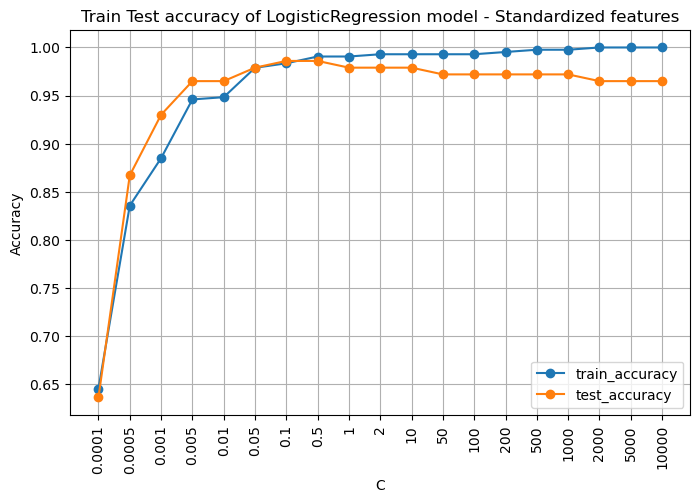

In [159]:
plt.figure(figsize=(8, 5))
plt.plot([str(c) for c in C_list], train_acc_list, label='train_accuracy', marker='o')
plt.plot([str(c) for c in C_list], test_acc_list, label='test_accuracy', marker='o')
plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title("Train Test accuracy of LogisticRegression model - Standardized features")

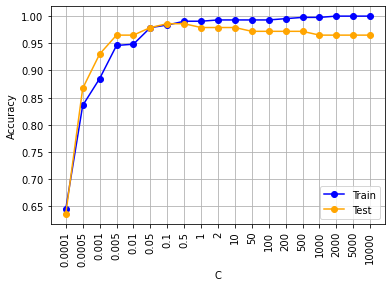

In [56]:
# code

### Question 9 [10 points]

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value.
- Starting from 10 data points in the training set, increase your training set size by 1 points in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [160]:
X_train_ss.shape

(426, 30)

In [161]:
# list(range(1, X_train_ss.shape[0]))
n=1
X_train_ss[0:n,:]

array([[-0.50323613,  1.73953408, -0.44053352, -0.49664617,  0.53358854,
         0.59839524,  0.25384105, -0.07259947,  0.47589812,  0.94655516,
         0.01943197,  1.10918571, -0.08331186, -0.11344568,  0.73341644,
         0.68332997,  0.17965816,  0.26900086, -0.2116796 ,  0.6599449 ,
        -0.12918496,  2.17946516, -0.1622508 , -0.19511526,  1.9967161 ,
         1.31027091,  0.79584853,  0.47330699,  0.45100311,  1.90561739]])

In [162]:
y_train

193    1
543    0
255    1
142    0
330    1
      ..
167    1
73     1
366    1
245    0
239    1
Length: 426, dtype: int64

In [163]:
accuracy_train = []
accuracy_test = []
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
    clf.fit(X_train_ss[0:n,:], y_train[0:n])
    pred_trn = clf.predict(X_train_ss[0:n,:])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_tst = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

Text(0.5, 1.0, 'Train Test accuracy of LogisticRegression model - Standardized features with C=.5')

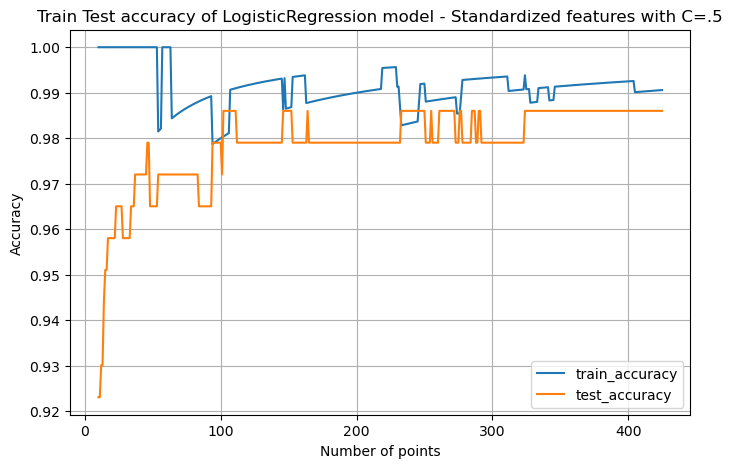

In [164]:
plt.figure(figsize=(8, 5))
plt.plot([i for i in range(10, X_train_ss.shape[0])], accuracy_train, label='train_accuracy')
plt.plot([i for i in range(10, X_train_ss.shape[0])], accuracy_test, label='test_accuracy')
plt.legend()
plt.grid()
plt.xlabel('Number of points')
plt.ylabel('Accuracy')
plt.title("Train Test accuracy of LogisticRegression model - Standardized features with C=.5")

From the plot above:
- The model is performing well with the given data. Although, it might show similar behavior in new data instances.
- test_accuracy increases with number of data instances. It might be good to collect more data in order to achieve good accuracy. 
- However, the accuracy does not improve beyond certain point (.985).
- In order to achieve more robust model, it might be good to include more data and do some feature engineering.

In [165]:
# code


### Question 10 [20 points]
- Think of other ways of improving the accuracy and list at least two possibilities.
- Implement both the methods you proposed. 
- Is the model accuracy increasing? Why do you think this might have helped?
- If both of them did not impove, can you think of anything else? (Optional to apply)

At first we will look at the distribution of features and see how they are distributed

In [166]:
plt_df = pd.DataFrame(X_train.stack()).reset_index(drop=False).rename({'level_1':'column', 0:'value'}, axis=1)

In [167]:
plt_df.shape

(12780, 3)

<Axes: xlabel='value', ylabel='column'>

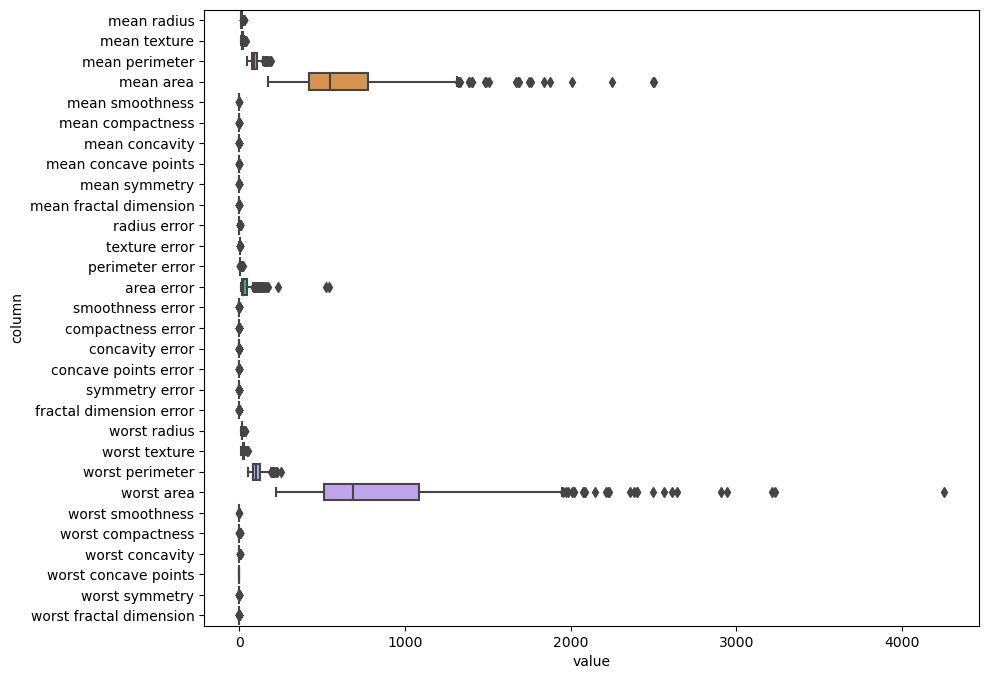

In [168]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='column', x='value', data=plt_df)

As seen above, the model performance is already good. However, it fluctuates for new data instances (between 0.98-0.99). This is a sign that the model has not generalized well on all possible data instances. 

In order to further improve the model accuracy, it might be good to try out one of the following techniques:
1. **Outlier handling** - removing or treating outliers correctly. Since, we're using logistic regression model, it is very sensitive to outliers given that it's a linear model. This can lead to lower accuracy. Treating the outliers by removing it or replacing it with mean/median to remove noise from the data and improve the accuracy of the model.
2. **Ensamble Models** - Trying an ensamble technique which can handle noise in the dataset will increase the performance of the model. `RandomForest` model is well known for handling outliers and shows promising results. We will try this model next. 
3. **feature engineering** - it might be good to perform some feature engineering of the existing features and see the performance. 
3. **p-value of features** - Looks like linear model is performing well on this dataset rather than non-linear one. It might be good to check the p-values of features and remove non-significant features from the dataset. Also, it will help us in incorporating interaction terms in the model.

## Outlier handling

From the distribution plot above, almost all the features have outliers. There might be few instances which has different bevahior than normal. 

We will remove these outlier instances from the dataset and check model performance.

We will use IQR technique to remove such outliers.

This technique will define the normal range of a feature, ignoring the data points that lie beyond +/- 1.5 times of inter quartile range

In [169]:
col = 'worst area'

In [170]:
q1 = X_train[col].quantile(0.25)
q3 = X_train[col].quantile(0.75)

In [171]:
iqr = q3-q1

In [172]:
new_X_train = X_train[((X_train[col]) > (q1 - 1.5*iqr)) & 
                     ((X_train[col]) < (q3 + 1.5*iqr))]

In [173]:
print(X_train.shape, new_X_train.shape)

(426, 30) (400, 30)


Now, we will build a model on new dataset.

In [174]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
193,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,0.4053,1.8090,2.642,34.44,0.009098,0.03845,0.03763,0.013210,0.01878,0.005672,15.65,39.34,101.70,768.9,0.1785,0.4706,0.44250,0.14590,0.3215,0.12050
543,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,0.05781,0.2351,1.5970,1.539,17.85,0.004973,0.01372,0.01498,0.009117,0.01724,0.001343,14.37,37.17,92.48,629.6,0.1072,0.1381,0.10620,0.07958,0.2473,0.06443
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.02679,0.03119,0.013420,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.3262,0.32090,0.13740,0.3068,0.07957
142,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,0.2843,1.9080,1.937,21.38,0.006664,0.01735,0.01158,0.009520,0.02282,0.003526,12.78,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,0.3371,0.7476,2.629,33.27,0.005839,0.03245,0.03715,0.014590,0.01467,0.003121,18.76,21.98,124.30,1070.0,0.1435,0.4478,0.49560,0.19810,0.3019,0.09124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,0.5990,1.3910,4.129,67.34,0.006123,0.02470,0.02626,0.016040,0.02091,0.003493,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.23180,0.14740,0.2810,0.07228
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.1411,0.3542,0.27790,0.13830,0.2589,0.10300
366,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,0.06020,0.9761,1.8920,7.128,103.60,0.008439,0.04674,0.05904,0.025360,0.03710,0.004286,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.37030,0.21520,0.3271,0.07632
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,0.3719,2.6120,2.517,23.22,0.016040,0.01386,0.01865,0.011330,0.03476,0.003560,11.48,29.46,73.68,402.8,0.1515,0.1026,0.11810,0.06736,0.2883,0.07748


In [175]:
new_y_train = y_train[y_train.index.isin(new_X_train.index)]

In [176]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(new_X_train)
X_test_ss = ss.transform(X_test)

In [177]:
accuracy_train = []
accuracy_test = []
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
    clf.fit(X_train_ss[0:n,:], new_y_train[0:n])
    pred_trn = clf.predict(X_train_ss[0:n,:])
    accuracy_train.append(metrics.accuracy_score(y_true = new_y_train[0:n], y_pred = pred_trn))
    pred_tst = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

Text(0.5, 1.0, 'Train Test accuracy of LogisticRegression model - Standardized features with C=.5 (without Outliers)')

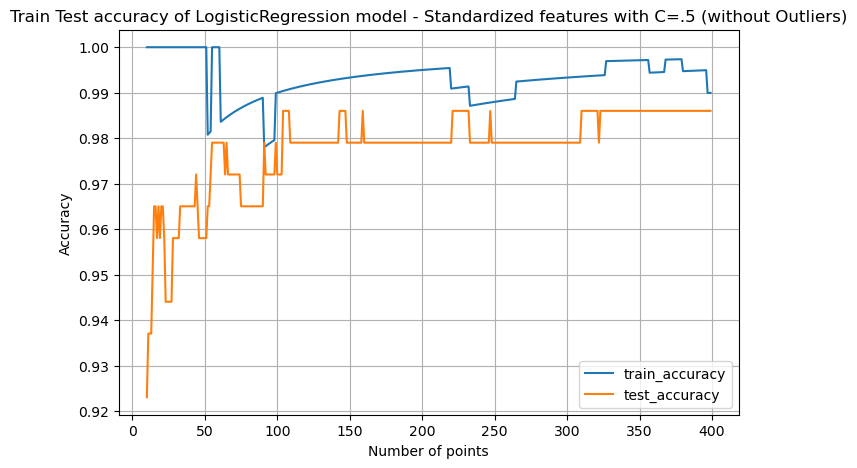

In [178]:
plt.figure(figsize=(8, 5))
plt.plot([i for i in range(10, X_train_ss.shape[0])], accuracy_train, label='train_accuracy')
plt.plot([i for i in range(10, X_train_ss.shape[0])], accuracy_test, label='test_accuracy')
plt.legend()
plt.grid()
plt.xlabel('Number of points')
plt.ylabel('Accuracy')
plt.title("Train Test accuracy of LogisticRegression model - Standardized features with C=.5 (without Outliers)")

*Model is showing similar behavior as before. The accuracy has not improved*

## Ensamble models

As seen above in box plots, there are outlier in the data. We will use a robust model and check the performance.

We will try ensamble model using `sklearn` package. 

`sklearn` has RandomForest which is robust to outliers.


In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [198]:
# define the parameter ranges to optimize
params = {
    "n_estimators": randint(10, 150),
    "max_features": [0.05, 0.1, 0.25, 0.5, 0.75, 1.0],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "bootstrap": [True, False]
}

In [199]:
rf_model = RandomForestClassifier(random_state=42)

In [200]:
# setup the random search 
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=params,
    random_state=123,
    n_iter=25,
    cv=5,
    verbose=1,
    n_jobs=1,
    return_train_score=True)

In [201]:
# fit model
random_search.fit(new_X_train, new_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=25, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.05, 0.1, 0.25, 0.5,
                                                         0.75, 1.0],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7fffdd4160>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7fffdd43d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7fffe12ec0>},
                   random_state=123, return_train_score=True, verbose=1)

In [202]:
random_search.best_params_

{'bootstrap': False,
 'max_features': 0.25,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 123}

In [212]:
rf_model = RandomForestClassifier(max_features=.25, n_estimators=50, random_state=42)

In [213]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.25, n_estimators=50, random_state=42)

In [214]:
test_pred = rf_model.predict(X_test)

In [215]:
metrics.f1_score(y_test, test_pred)

0.9622641509433962

In [216]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Conclusion:

As seen from above results, the model performance has not improved. 

The performance lies between `KNearestNeighbors < DecisionTreeClassifier < Logistic Regression.`

Since the data is very less, the model is not able to capture all the variance in the data which results in low model performance improvement. The model performance will surely improve if the dataset. 


Also, more dataset will give us an upper hand to try different models and techniques like `XGBoost, Deep learning, hyperparameter tuning`.